<a href="https://colab.research.google.com/github/Son-github/ML-chapter9_3/blob/main/ML_chapter9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 25ms/step - loss: 0.6929 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5490
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6921 - accuracy: 0.5543 - val_loss: 0.6916 - val_accuracy: 0.5756
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6909 - accuracy: 0.5885 - val_loss: 0.6900 - val_accuracy: 0.5966
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6884 - accuracy: 0.6157 - val_loss: 0.6866 - val_accuracy: 0.6236
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6824 - accuracy: 0.6450 - val_loss: 0.6767 - val_accuracy: 0.6594
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6569 - accuracy: 0.6859 - val_loss: 0.6232 - val_accuracy: 0.7086
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.5993 - accuracy: 0.7068 - val_loss: 0.5835 - val_accuracy: 0.

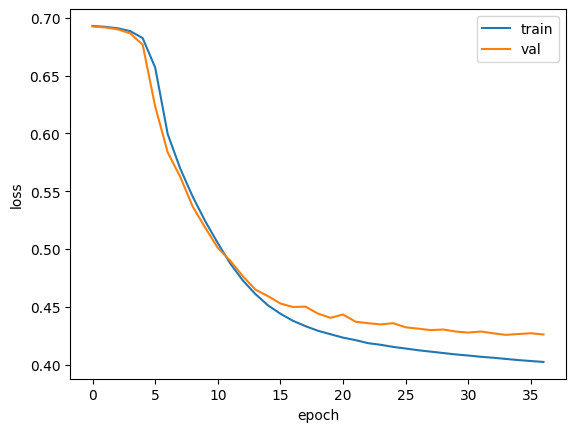

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 39ms/step - loss: 0.6926 - accuracy: 0.5321 - val_loss: 0.6916 - val_accuracy: 0.5922
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6898 - accuracy: 0.6066 - val_loss: 0.6867 - val_accuracy: 0.6500
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6715 - accuracy: 0.6703 - val_loss: 0.6419 - val_accuracy: 0.6896
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6218 - accuracy: 0.6868 - val_loss: 0.6085 - val_accuracy: 0.7014
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6015 - accuracy: 0.7037 - val_loss: 0.5899 - val_accuracy: 0.7198
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5837 - accuracy: 0.7209 - val_loss: 0.5742 - val_accuracy: 0.7316
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5687 - accuracy: 0.7330 - val_loss: 0.5618 - val_accuracy

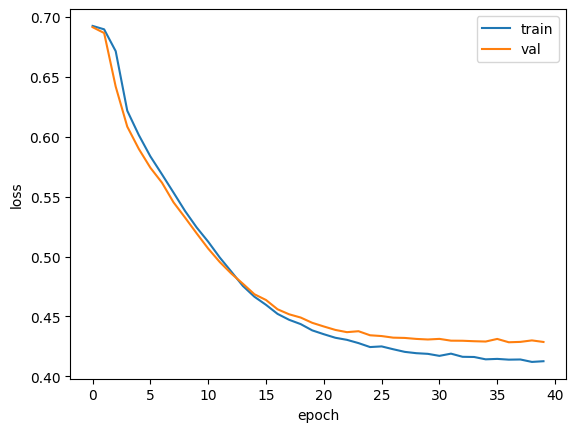

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 27ms/step - loss: 0.6923 - accuracy: 0.5472 - val_loss: 0.6911 - val_accuracy: 0.6178
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6881 - accuracy: 0.5996 - val_loss: 0.6821 - val_accuracy: 0.6630
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6546 - accuracy: 0.6766 - val_loss: 0.6205 - val_accuracy: 0.6856
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6020 - accuracy: 0.6958 - val_loss: 0.5827 - val_accuracy: 0.7162
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5699 - accuracy: 0.7229 - val_loss: 0.5516 - val_accuracy: 0.7430
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5456 - accuracy: 0.7429 - val_loss: 0.5275 - val_accuracy: 0.7566
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5234 - accuracy: 0.7571 - val_loss: 0.5108 - val_accuracy

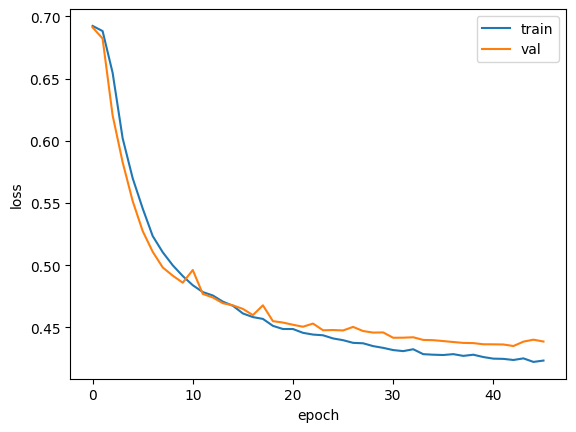

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [17]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 23ms/step - loss: 0.6928 - accuracy: 0.5086 - val_loss: 0.6922 - val_accuracy: 0.5284
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6915 - accuracy: 0.5451 - val_loss: 0.6909 - val_accuracy: 0.5446
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6898 - accuracy: 0.5659 - val_loss: 0.6888 - val_accuracy: 0.5728
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6870 - accuracy: 0.5896 - val_loss: 0.6859 - val_accuracy: 0.5772
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6829 - accuracy: 0.5974 - val_loss: 0.6815 - val_accuracy: 0.5850
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6768 - accuracy: 0.6061 - val_loss: 0.6747 - val_accuracy: 0.5984
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6679 - accuracy: 0.6230 - val_loss: 0.6647 - val_accuracy: 0.612

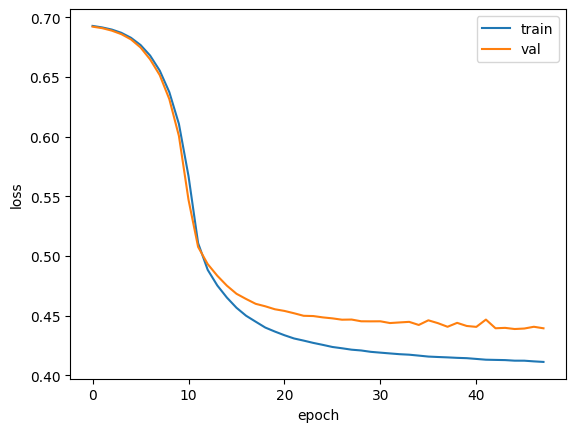

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 4s 5ms/step - loss: 0.4314 - accuracy: 0.7994


[0.43138256669044495, 0.7993599772453308]